In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IF small dataset and less columns is present we use KNN

In [2]:
iris = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/IRIS.csv?raw=true')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_2100\2930510642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=iris,x='species',palette='mako')# palette is colour from online color palette


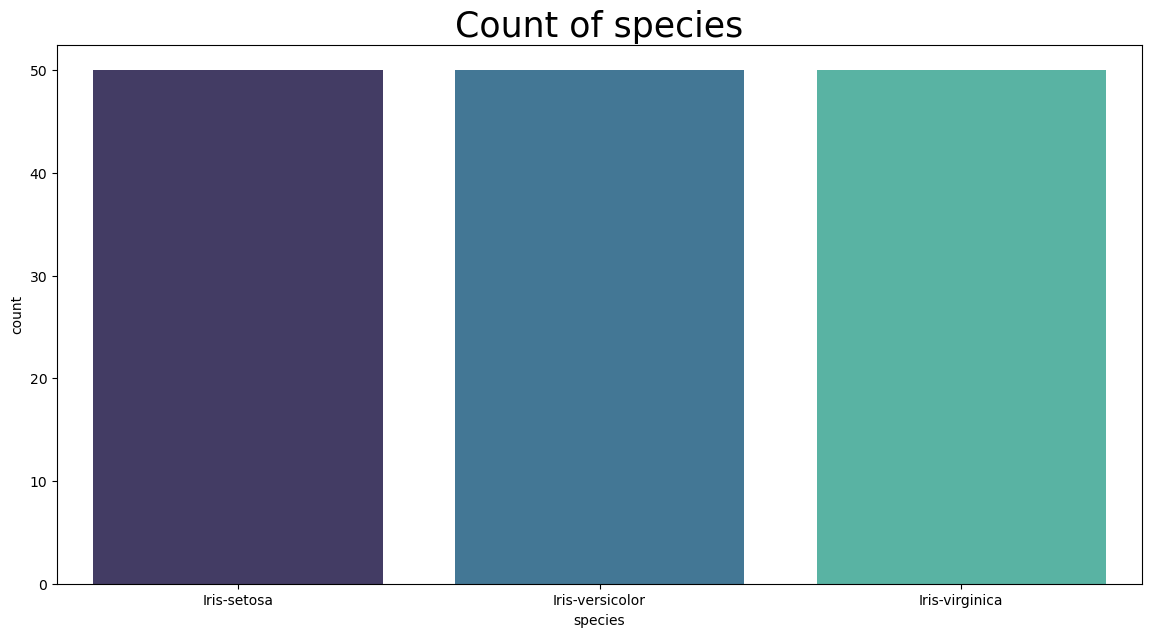

In [6]:
plt.figure(figsize=(14,7))
sns.countplot(data=iris,x='species',palette='mako')# palette is colour from online color palette
plt.title('Count of species',size=25)
plt.show()

In [7]:
X = iris.drop('species',axis=1)
Y = iris ['species']

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

KNN = measure the nearest point distance
formula use eculadeal distance

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2)

In [10]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [11]:
knn_model.predict([[1.3,5.3,2.4,1.3]])

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [12]:
predictions = knn_model.predict(X_test)

In [13]:
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.75      0.86         8

       accuracy                           0.93        30
      macro avg       0.95      0.92      0.93        30
   weighted avg       0.94      0.93      0.93        30



#### Elbow method for best value of k

In [15]:
error = []
for k in range(2,11):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,Y_train)
    predictions = knn_model.predict(X_test)
    e = np.mean(Y_test!=predictions)
    error.append(e)

In [16]:
error

[0.06666666666666667,
 0.0,
 0.06666666666666667,
 0.0,
 0.0,
 0.0,
 0.06666666666666667,
 0.03333333333333333,
 0.03333333333333333]

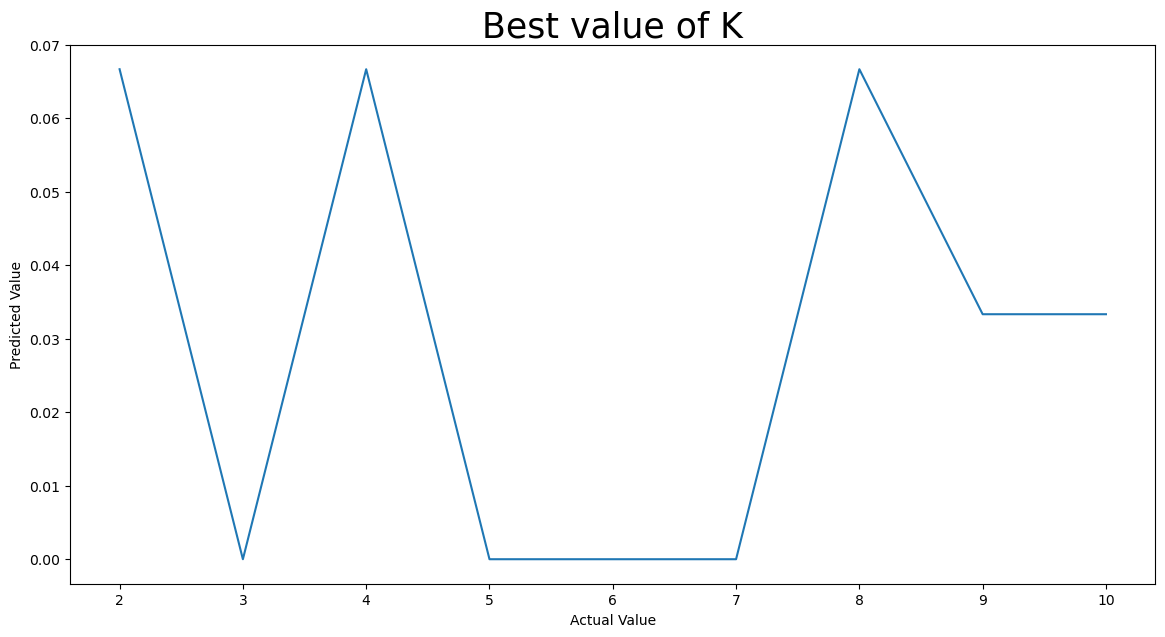

In [17]:
plt.figure(figsize=(14,7))
plt.plot(range(2,11),error)
plt.title('Best value of K',size=25)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [20]:
min_max_scaler.fit(X)

MinMaxScaler()

In [21]:
X_scaled = min_max_scaler.transform(X)